## 선박 정시 도착 예측 데이터

* ID: 고객의 ID 번호입니다.
* Warehouse_block: 회사는 A,B,C,D,E와 같은 블록으로 나누어진 큰 창고를 가지고 있습니다.
* Mode_of_Shipment: 회사는 선박, 항공, 육로 등 다양한 방법으로 제품을 배송합니다.
* Customer_care_calls	: 배송문의를 위한 문의 전화 횟수입니다.
* Customer_rating: 회사는 모든 고객으로부터 평가를 받았습니다. 1이 가장 낮음(Worst), 5가 가장 높음(Best)입니다.
* Cost_of_the_Product: 미국 달러로 표시된 제품 가격입니다.
* Prior_purchases: 사전 구매 횟수입니다.
* Product_importance: 회사는 낮음, 중간, 높음과 같은 다양한 매개변수로 제품을 분류했습니다.
* Gender: 남성과 여성.
* Discount_offered: 해당 특정 제품에 대해 할인이 제공됩니다.
* Weight_in_gms: 그램 단위의 무게입니다.
* Reached.on.Time_Y.N: 목표 변수이며, 1은 제품이 정시에 도착하지 않았음을 나타내고 0은 정시에 도달했음을 나타냅니다.

### 1. 데이터 불러와서 df에 저장하세요
* https://raw.githubusercontent.com/kim-juwan/data_folder/main/data/shipment_trn.csv

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [24]:
from matplotlib import font_manager, rc
font = 'C:/Windows/Fonts/Malgun.ttf'
font_name = font_manager.FontProperties(fname=font).get_name()
rc('font', family=font_name)

In [25]:
df=pd.read_csv('https://raw.githubusercontent.com/kim-juwan/data_folder/main/data/shipment_trn.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3685,D,Road,4,3,258,2,low,F,2,4308,0
1,9822,F,Ship,4,2,151,3,medium,M,3,5154,1
2,4305,A,Ship,4,4,163,2,low,F,9,4720,0
3,10977,A,Flight,3,2,278,4,medium,M,9,1631,0
4,3916,B,Ship,3,4,250,3,low,M,10,5688,0


### 2. 모든 컬럼의 값과 dtype을 확인하시고 이상한 컬럼을 찾아 정상으로 수정하세요
* df.head()와 df.info() 또는 dtypes를 사용하여 확인
* 정수만 있는 컬럼 중 dtype이 이상한 컬럼이 있다
* apply를 사용하여 처리하세요

In [ ]:
df.info()

In [ ]:
df.describe()

In [26]:
df['Discount_offered'].iloc[17:]

17       *7 
18         6
19       *7 
20        10
21        15
        ... 
8004       1
8005       2
8006       5
8007       4
8008      29
Name: Discount_offered, Length: 7992, dtype: object

In [27]:
import re
def cleaning(text):
    p = re.compile('[^ a-zA-Z0-9\.]+')
    result = p.sub('',text).lower()
    return result
df['Discount_offered']=df['Discount_offered'].apply(cleaning)

df['Discount_offered'].value_counts()

Discount_offered
 7     1386
2       753
10      731
9       721
3       713
6       710
1       710
4       691
5       687
12       56
23       50
20       48
22       46
33       45
19       44
17       43
27       41
11       41
15       41
29       40
18       39
32       39
21       38
28       38
13       37
16       37
24       36
31       34
26       30
14       30
30       28
25       26
Name: count, dtype: int64

In [28]:
df['Discount_offered']=df['Discount_offered'].astype('int64')
df['Discount_offered'].value_counts()

Discount_offered
7     1386
2      753
10     731
9      721
3      713
6      710
1      710
4      691
5      687
12      56
23      50
20      48
22      46
33      45
19      44
17      43
27      41
11      41
15      41
29      40
18      39
32      39
21      38
28      38
13      37
16      37
24      36
31      34
26      30
14      30
30      28
25      26
Name: count, dtype: int64

### 3. ID 컬럼을 제거하여 df로 다시 저장하세요

In [ ]:
df=df.drop('ID', axis=1, inplace=True)

### 4. Reached.on.Time_Y.N 컬럼을 사용해서 파이 그래프를 그리세요.
* df['Reached.on.Time_Y.N'].value_counts() 사용하기
* plt.pie()
* autopct = '%.2f%%'로 소수점 둘째자리까지 표현

In [31]:
X=df['Reached.on.Time_Y.N'].value_counts() 

([<matplotlib.patches.Wedge at 0x16f8ab540d0>,
 [Text(1.1647107361421187, -0.11112560962840146, '도착'),
  Text(-1.1448011509089202, 0.10922602655783042, '미도착')],
 [Text(0.6669711053121534, -0.06363603286412732, '53.03%'),
  Text(-0.6470615200789548, 0.061736449793556324, '46.97%')])

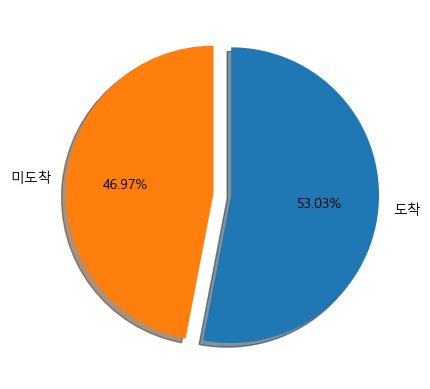

In [32]:
plt.pie(X, labels=['도착','미도착'], autopct = '%.2f%%', startangle = 90, counterclock = False, explode = [0.07, 0.05], shadow = True)

### 5. 컬럼 Reached.on.Time_Y.N에 따른 Weight_in_gms 컬럼 값이 차이가 있는지 확인하기 위해 barplot을 통해 그래프를 그리고 통계 검정을 하세요.

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Weight_in_gms'>

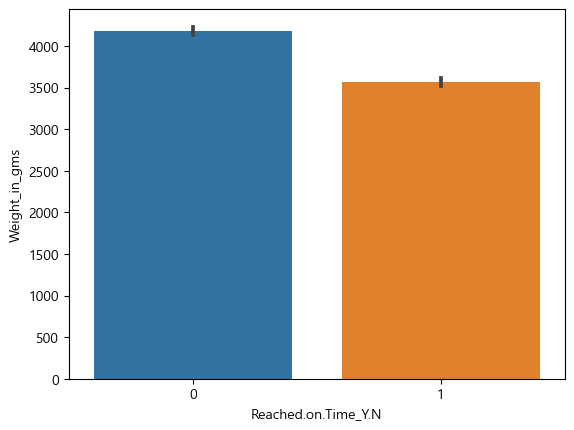

In [33]:
sns.barplot(data=df, x='Reached.on.Time_Y.N', y='Weight_in_gms')

In [34]:
import statsmodels.api as sm
from scipy import stats
## 상관관계

w0 = df[df['Reached.on.Time_Y.N'] == 0]['Weight_in_gms']
w1 = df[df['Reached.on.Time_Y.N'] == 1]['Weight_in_gms']

print(stats.shapiro(w0))
print(stats.shapiro(w1))

ShapiroResult(statistic=0.8161751627922058, pvalue=0.0)
ShapiroResult(statistic=0.9021150469779968, pvalue=0.0)


In [35]:
stats.mannwhitneyu(w0, w1)

MannwhitneyuResult(statistic=9718822.5, pvalue=5.275708624539275e-63)

In [36]:
# <로지스틱 회귀모형을 통한 검정> 회귀계수 0인가
import statsmodels.api as sm

model=sm.Logit(df['Reached.on.Time_Y.N'], df['Weight_in_gms'])
result=model.fit()

# 귀무: 해당 변수의 회귀계수가 0이다
#     --독립과 종속이 관련이 없다.  

Optimization terminated successfully.
         Current function value: 0.692990
         Iterations 2


### 6. 컬럼 Reached.on.Time_Y.N에 따른 Customer_care_calls 컬럼 값이 차이가 있는지 확인하기 위해 barplot을 통해 그래프를 그리고 통계 검정을 하세요.

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Customer_care_calls'>

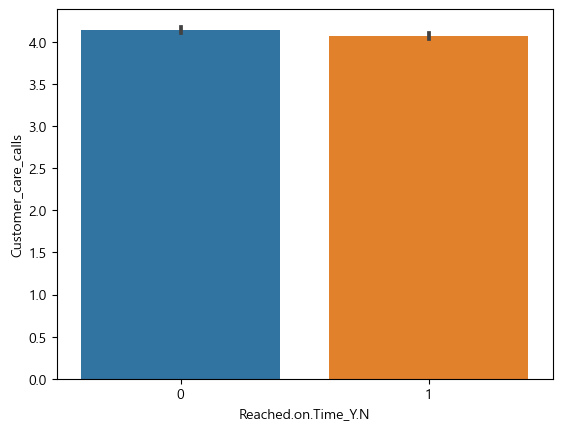

In [43]:
sns.barplot(data=df, x='Reached.on.Time_Y.N', y='Customer_care_calls')

In [38]:
from scipy import stats
c_df=pd.crosstab(df['Customer_care_calls'], df['Reached.on.Time_Y.N'])
c_df

Reached.on.Time_Y.N,0,1
Customer_care_calls,,
2,189,243
3,1020,1238
4,1236,1368
5,800,881
6,415,411
7,102,106


In [39]:
c0 = df[df['Reached.on.Time_Y.N'] == 0]['Customer_care_calls']
c1 = df[df['Reached.on.Time_Y.N'] == 1]['Customer_care_calls']

print(stats.shapiro(c0))
print(stats.shapiro(c1))

ShapiroResult(statistic=0.9203817844390869, pvalue=9.935766631448683e-41)
ShapiroResult(statistic=0.9179314374923706, pvalue=3.5032461608120427e-43)


In [40]:
stats.mannwhitneyu(c0, c1)

MannwhitneyuResult(statistic=8270764.0, pvalue=0.00466846385529496)

In [41]:
# 할지
model=sm.Logit(df['Reached.on.Time_Y.N'], df['Customer_care_calls'])
result=model.fit()

# 귀무: 해당 변수의 회귀계수가 0이다
#     --독립과 종속이 관련이 없다.  

Optimization terminated successfully.
         Current function value: 0.691909
         Iterations 3


In [42]:
c_df = pd.crosstab(df['Customer_care_calls'], df['Reached.on.Time_Y.N'])
c_df

Reached.on.Time_Y.N,0,1
Customer_care_calls,,
2,189,243
3,1020,1238
4,1236,1368
5,800,881
6,415,411
7,102,106


In [22]:
stats.chi2_contingency(c_df)

Chi2ContingencyResult(statistic=9.150990143108872, pvalue=0.10319111893973698, dof=5, expected_freq=array([[ 202.91971532,  229.08028468],
       [1060.6312898 , 1197.3687102 ],
       [1223.15495068, 1380.84504932],
       [ 789.60194781,  891.39805219],
       [ 387.99001124,  438.00998876],
       [  97.70208515,  110.29791485]]))

### 7. 컬럼 Product_importance에 따른 종속변수 값이 차이가 있는지 확인하기 위해 countplot을 통해 그래프를 그리고 통계 검정을 하세요.
* x = 'Product_importance', hue = 'Reached.on.Time_Y.N'

AttributeError: 'numpy.int64' object has no attribute 'startswith'

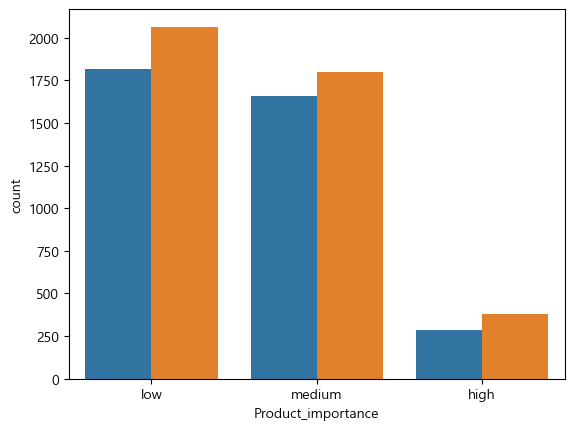

In [44]:
sns.countplot(data=df, x='Product_importance', hue='Reached.on.Time_Y.N')

In [45]:
# 카이검정
stats.chi2_contingency(c_df)

Chi2ContingencyResult(statistic=9.150990143108872, pvalue=0.10319111893973698, dof=5, expected_freq=array([[ 202.91971532,  229.08028468],
       [1060.6312898 , 1197.3687102 ],
       [1223.15495068, 1380.84504932],
       [ 789.60194781,  891.39805219],
       [ 387.99001124,  438.00998876],
       [  97.70208515,  110.29791485]]))

### 8. df의 'Reached.on.Time_Y.N' 컬럼을 y에 저장하고 기존 df에서 컬럼을 제거하세요

In [46]:
y= df['Reached.on.Time_Y.N']
df=df.drop('Reached.on.Time_Y.N', axis=1)

In [47]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

### 9. 'Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender' 컬럼을 df_str으로 추출하세요



In [48]:
df_str=df[['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender']]

### 10. 숫자형 컬럼을 df_num로 추출하세요

In [49]:
df_num=df.drop(['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender'], axis=1)

In [50]:
df_num.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms'],
      dtype='object')

### 11. df_str은 OneHotEncoder를 사용하여, df_num는 MinMaxScaler를 이용하여 전처리하세요
* df_str은 str_scaled에 저장
* df_num은 num_scaled에 저장

In [51]:
from sklearn.preprocessing import OneHotEncoder

oh=OneHotEncoder()
str_scaled = oh.fit_transform(df_str)  
str_scaled

<8009x18 sparse matrix of type '<class 'numpy.float64'>'
	with 40045 stored elements in Compressed Sparse Row format>

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_scaled=scaler.fit_transform(df_num)
num_scaled

array([[0.4       , 0.75700935, 0.        , 0.03125   , 0.51671875],
       [0.4       , 0.25700935, 0.125     , 0.0625    , 0.64890625],
       [0.4       , 0.31308411, 0.        , 0.25      , 0.58109375],
       ...,
       [0.6       , 0.76168224, 0.5       , 0.125     , 0.05953125],
       [1.        , 0.98130841, 0.25      , 0.09375   , 0.1153125 ],
       [0.6       , 0.1728972 , 0.25      , 0.875     , 0.01453125]])

### 12. str_scaled, num_scaled를 데이터프레임으로 바꾼뒤 axis =1로 합치고 data에 저장하세요
* str_scaled는 toarray() 함수를 통해 넘파이 배열로 만들기

In [54]:
import numpy as np
data=np.concatenate([str_scaled.toarray(),num_scaled], axis=1)
data.shape

(8009, 23)

In [ ]:
# Ns=pd.DataFrame(num_scaled, columns=df_num.columns)
# Ss=pd.DataFrame(str_scaled)
# #Ss.columns=Ss.columns.astype(str)

In [ ]:
# data=pd.concat([Ns, Ss], axis=1)
# data.info()

### 13. train_test_split을 사용하여 data는 X_train, X_test, y는 y_train, y_test로 나누세요
* 비율은 9:1
* random_state는 0

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(data,y,test_size = 0.1,random_state = 0)
print(X_train.shape, y_test.shape, X_test.shape)

(7208, 23) (801,) (801, 23)


### 14. GradientBoostMachine을 사용하여 gbm 모델을 생성하세요
* n_estimators = 200
* max_depth = 5
* learning_rate = 0.01
* random_state = 120

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gbm= GradientBoostingClassifier(n_estimators = 200, max_depth = 5, learning_rate=0.01, random_state=120)

### 15. 학습 데이터를 사용해 gbm 모델을 학습하고 테스트 데이터로 예측한 결과를 pred에 저장하세요

In [57]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=200,
                           random_state=120)

In [63]:
pred=gbm.predict(X_test)

In [64]:
pred_proba=gbm.predict_proba(X_test)

In [68]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
print(accuracy_score(y_test, pred))

0.6142322097378277


### 16. roc_auc_score를 사용하여 y_test와 pred를 평가하세요

In [69]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
roc_auc_score(y_test, pred_proba[:,1])

0.6605632040050062

### 17. 모델 성능 향상을 위해 다양한 방법을 시도하여보세요